# Analyse des dialogues dans l'Avare de Molière

Auteur : Emile Pierret

Nous proposons d'étudier la part de dialogue de chacun des personnages de l'Avare de Molière.

In [1]:
%matplotlib inline
import pylab as plt
import matplotlib.patches as mpatches
import numpy as np

#Version numpy : 1.15.2
#Version matplotlib  : 2.2.3
#python 3.6.4

## 1. Etude des données

Le texte utilisé a été télécharger au lien suivant: http://dramacode.github.io/markdown/moliere_avare.txt, le 1er avril 2023 à 14h09. Il est disponible sur le git, au nom de "moliere_avare.txt"

In [2]:
fichier = open("moliere_avare.txt", "r")

In [3]:
lignes = fichier.readlines()

In [4]:
k = 0
while lignes[k] != '# ACTEURS.\n' :
    k +=1

In [5]:
lignes[k]

'# ACTEURS.\n'

In [6]:
for k in range(19,33) :
    print(lignes[k])

 – Harpagon, Père de Cléante et d'Élise, et Amoureux de Mariane.

 – Cléante, Fils d'Harpagon, Amant de Mariane.

 – Élise, Fille d'Harpagon, Amante de Valère.

 – Valère, Fils d'Anselme, et Amant d'Élise.

 – Mariane, Amante de Cléante, et aimée d'Harpagon.

 – Anselme, Père de Valère et de Mariane.

 – Frosine, Femme d'Intrigue.

 – Maitre Simon, Courtier.

 – Maitre Jacques, Cuisinier et Cocher d'Harpagon.

 – La Flèche, Valet de Cléante.

 – Dame Claude, Servante d'Harpagon.

 – Brindavoine, laquais d'Harpagon.

 – La Merluche, laquais d'Harpagon.

 – Le commissaire, et son clerc.



In [16]:
caractères = []
for k in range(len(lignes)) :
    ligne = lignes[k]
    for i in range(len(ligne)) :
        if not(ligne[i] in caractères) :
            caractères.append(ligne[i])

In [17]:
caractères

['-',
 '\n',
 'i',
 'd',
 'e',
 'n',
 't',
 'f',
 'r',
 ':',
 ' ',
 'm',
 'o',
 'l',
 '_',
 'a',
 'v',
 'c',
 'M',
 'è',
 '.',
 '1',
 '6',
 '8',
 'L',
 "'",
 'A',
 'C',
 'é',
 'V',
 'R',
 'E',
 ',',
 'O',
 'É',
 'D',
 'I',
 'P',
 'J',
 'B',
 'È',
 'À',
 'S',
 'h',
 'z',
 'N',
 'U',
 'u',
 's',
 'à',
 'g',
 'p',
 'X',
 '*',
 'G',
 '#',
 'T',
 '–',
 'H',
 'x',
 'F',
 'q',
 'b',
 '?',
 'j',
 '!',
 'ù',
 'y',
 'î',
 'ê',
 '\xa0',
 ';',
 'œ',
 'ç',
 'ô',
 'â',
 'û',
 'ï',
 'Q',
 '…',
 'Ê',
 'Ô',
 'Y',
 'Î',
 '<',
 '>']

In [20]:
lettres = ['i',
 'd',
 'e',
 'n',
 't',
 'f',
 'r',
 'm',
 'o',
 'l',
 'a',
 'v',
 'c',
 'M',
 'è',
 'L',
 'A',
 'C',
 'é',
 'V',
 'R',
 'E',
 'O',
 'É',
 'D',
 'I',
 'P',
 'J',
 'B',
 'È',
 'À',
 'S',
 'h',
 'z',
 'N',
 'U',
 'u',
 's',
 'à',
 'g',
 'p',
 'X',
 'G',
 'T',
 'H',
 'x',
 'F',
 'q',
 'b',
 'j',
 'ù',
 'y',
 'î',
 'ê',
 'œ',
 'ç',
 'ô',
 'â',
 'û',
 'ï',
 'Q',
 'Ê',
 'Ô',
 'Y',
 'Î']

In [21]:
def split_string(s) :
    n = len(s)
    liste_mots = []
    k = 0
    while k < n :
        mot = ""
        while (k < n) and not (s[k] in lettres) :
            k +=1
        mot += s[k]
        k+=1
        while (k < n) and (s[k] in lettres) :
            mot += s[k]
            k +=1
        k+=1
        liste_mots.append(mot)
    return liste_mots

In [ ]:
split_string(lignes[48])

In [8]:
persos = []
for k in range(19,33) :
    l = lignes[k]
    i = 3
    perso = ""
    while l[i] != "," :
        perso += l[i]
        i+=1
    persos.append("    "+perso.upper()+".\n")
print(persos)
persos[7] = '    MAÎTRE SIMON.\n'
persos[8] = '    MAÎTRE JACQUES.\n'
Nombre_repliques = {}
for perso in persos :
    Nombre_repliques[perso] = 0

Nombre_mots = {}
for perso in persos :
    Nombre_mots[perso] = 0

Nombre_scènes = {}
for perso in persos :
    Nombre_scènes[perso] = 0

Nombre_actes = {}
for perso in persos :
    Nombre_actes[perso] = []

['    HARPAGON.\n', '    CLÉANTE.\n', '    ÉLISE.\n', '    VALÈRE.\n', '    MARIANE.\n', '    ANSELME.\n', '    FROSINE.\n', '    MAITRE SIMON.\n', '    MAITRE JACQUES.\n', '    LA FLÈCHE.\n', '    DAME CLAUDE.\n', '    BRINDAVOINE.\n', '    LA MERLUCHE.\n', '    LE COMMISSAIRE.\n']


In [9]:
dico_acte = {}
acte_courant = 0
for k in range(34,len(lignes)) :
    l = lignes[k]
    if l[:3] == '###' :
        scène_courante += 1
        dico_scènes[scène_courante]= {}
        for perso in persos :
            dico_scènes[scène_courante][perso] = 0
    elif l[:2] == '##' :
        if acte_courant >= 1 :
            dico_acte[acte_courant] = dico_scènes
        scène_courante = 0
        acte_courant += 1
        dico_scènes = {}
    if l in persos :
        Nombre_repliques[l] += 1
        dico_scènes[scène_courante][l] += 1
        Nombre_mots[l] += len(lignes[k+1].split()) #problème ponctuation
        if not (acte_courant in Nombre_actes[l]) :
            Nombre_actes[l].append(acte_courant)
dico_acte[acte_courant] = dico_scènes

In [10]:
dict(sorted(Nombre_mots.items(), key=lambda item:item[1]))

{'    DAME CLAUDE.\n': 0,
 '    BRINDAVOINE.\n': 38,
 '    LA MERLUCHE.\n': 49,
 '    MAÎTRE SIMON.\n': 186,
 '    LE COMMISSAIRE.\n': 281,
 '    ANSELME.\n': 488,
 '    MARIANE.\n': 854,
 '    ÉLISE.\n': 893,
 '    MAÎTRE JACQUES.\n': 1341,
 '    LA FLÈCHE.\n': 1419,
 '    FROSINE.\n': 2033,
 '    VALÈRE.\n': 2532,
 '    CLÉANTE.\n': 3172,
 '    HARPAGON.\n': 5179}

In [11]:
dict(sorted(Nombre_repliques.items(), key=lambda item:item[1]))

{'    DAME CLAUDE.\n': 0,
 '    BRINDAVOINE.\n': 3,
 '    MAÎTRE SIMON.\n': 5,
 '    LA MERLUCHE.\n': 5,
 '    LE COMMISSAIRE.\n': 17,
 '    ANSELME.\n': 20,
 '    MARIANE.\n': 27,
 '    ÉLISE.\n': 50,
 '    FROSINE.\n': 59,
 '    LA FLÈCHE.\n': 64,
 '    MAÎTRE JACQUES.\n': 83,
 '    VALÈRE.\n': 99,
 '    CLÉANTE.\n': 160,
 '    HARPAGON.\n': 344}

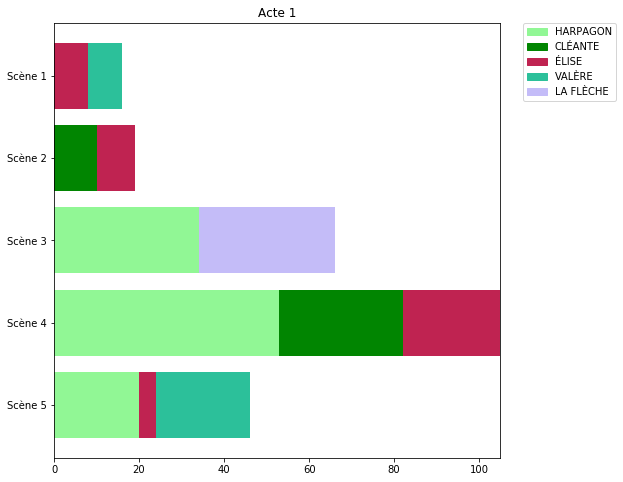

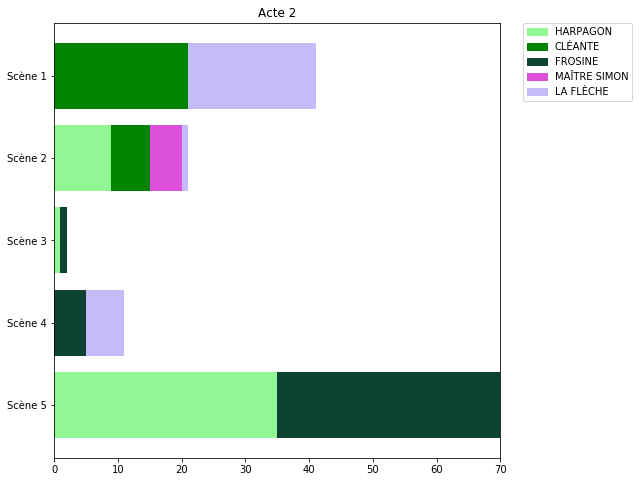

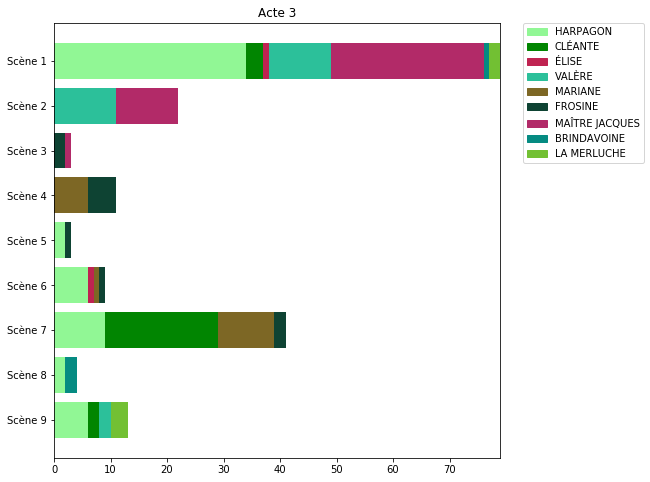

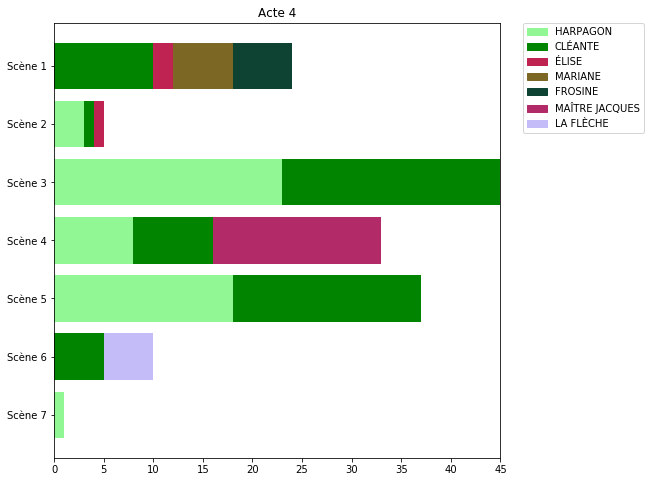

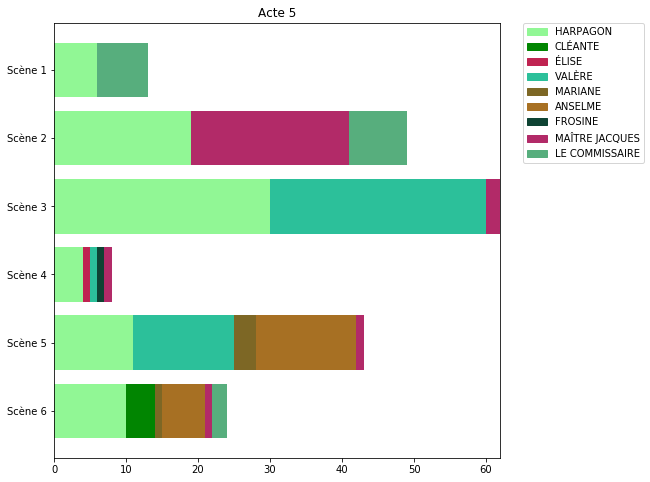

In [221]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


for acte in range(1,6) :
    plt.figure(figsize=(8,8))
    x = np.zeros((len(dico_acte[acte]),len(persos)))
    labels = persos
    for scene in range(1,len(dico_acte[acte])+1) :
        for l,perso in enumerate(persos) :
                x[scene-1,l] += dico_acte[acte][scene][perso]
    plt.title('Acte ' + str(acte))
    #plt.bar(labels,x)
    width = 1/2  # épaisseur de chaque bâton
    # Création du diagramme en bâtons (bâtons côte à côte)
    for scene in range(1,len(dico_acte[acte])+1) :
        bt = 0
        for l,perso in enumerate(persos) :
            plt.barh(-scene, x[scene-1,l],left = bt,color=colors[l])
            bt += x[scene-1,l]
    plt.yticks(-np.arange(scene)-1, np.array(["Scène "+str(k) for k in range(1,scene+1)]))
    patches = []
    for l,perso in enumerate(persos):
        if acte in Nombre_actes[perso] :
            patches.append(mpatches.Patch(color=colors[l], label=perso[4:-2]))
    plt.legend(handles=patches,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)